# Individual Coursework
MSIN0097 - Predictive Analytics

March 2022


Link to notebook repository: https://colab.research.google.com/drive/1nJBfiDWZIww9b7KBzjfgD3uktX3Bxo8C?usp=sharing

In [103]:
# Common imports
import sys
assert sys.version_info >= (3, 5)
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import os
import pandas as pd
import seaborn as sns 

# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Problem Framing:

The problem I am trying to solve is predicting whether a mushroom is edible or poisonous. The dataset I have chosen is a record of 8124 instances of mushrooms, with information on 23 different observable characteristics.

This will be a binary classification problem, as the machine learning models will categorizing each mushroom as either edible or poisonous. This type of problem requires a very high degree of accuracy, as even one falsely categorized poisonous mushroom can cause serious consequences if ingested.

## Data Exploration


In [2]:
mushrooms = pd.read_csv("C:/Users/marku/Desktop/MSIN0097 Predictive Analytics/Individual Coursework - Due March 4/Datasets/mushrooms.csv")
#work referenced (UCI)

In [3]:
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


As shown above, each category correponds to a different described characteristic for each mushroom. The characteristic is attributed a letter, which corresponds to a certain key. Definitions for each letter and category can be accessed in the Appendix. The first column "class" determines whether the mushroom is edible (denoted as "e") or poisonous ("p"). This will be important for the test data.

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

You can see above that the null count for every column is 0. Meaning there are no missing values to contend with.

In [5]:
mushroom_check = mushrooms.drop_duplicates()
mushroom_check["class"].count()

8124

Every mushroom instance is unique, as even after dropping duplicates there are still 8124 instances.

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The category with the highest variance is gill-colour, which includes 12 different unique types. This could prove to be an important explanatory feature.

In [7]:
mushrooms['class'].value_counts() #how many edible vs. poisonous in the dataset

e    4208
p    3916
Name: class, dtype: int64

The edible and poisonous split between the instances is fairly even. The class category can be visualized for further insight into the closeness of the split:

C:\Users\marku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of edible/poisonous mushrooms')

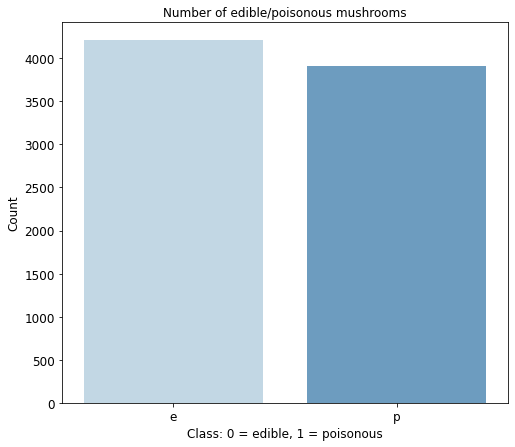

In [8]:
count = mushrooms['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="Blues")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class: 0 = edible, 1 = poisonous', fontsize=12)
plt.title('Number of edible/poisonous mushrooms')

## Data Preparation:

As seen above, all data is categorized as letters (objects), representing different attributes for each column.

These will need to be converted to numerical categories to properly analyze the data, because Machine Learning algorithms require numerial inputs. This can be done as follows using Scikit-learn's "LabelEncoder". There is no need for one hot encoding, as each category is a unique enough from one another.

In [9]:
mushrooms = mushrooms.astype('category') #define each type as category in order to encode numerically
mushrooms.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
labelencoder=LabelEncoder() #encode all values in numbers
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])

In [13]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


All values have been converted ordinally and there are no categorical values left. For the class category 1 has become poisonous and 0 edible. The histogram below shows the breakdown of each category:


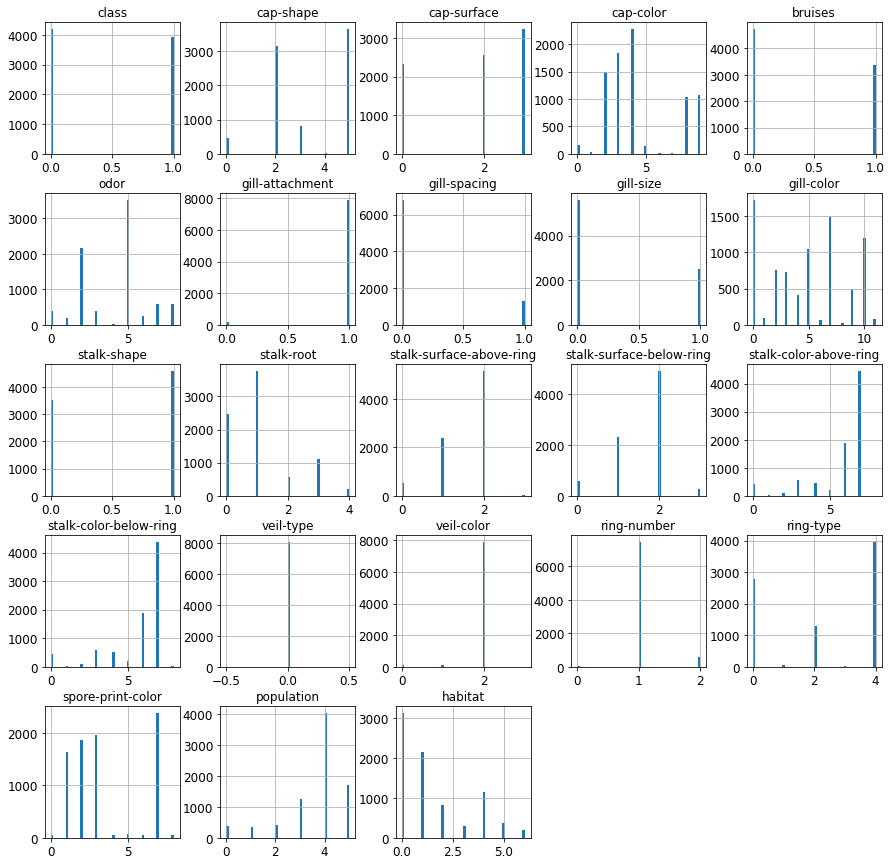

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
mushrooms.hist(bins=50, figsize=(15,15))
plt.show()

The histograms above show significant variation among the features. Only a few features are binary variables, with others containing multiple classes (cap-colour, odor, spore colour etc.). The lowest scale is 0 and highest reaches only 12 (gill-colour), so scaling of the data is not required.

Column “veil-type” shows no variation, with only one descriptor. It is therefore not telling us anything about the data and not relevant to the dataset, so it can be removed with the following code: 

In [16]:
mushrooms = mushrooms.drop(["veil-type"],axis=1)

There are now 22 features total including class.

Next we can take a look at the correlation between all variables:

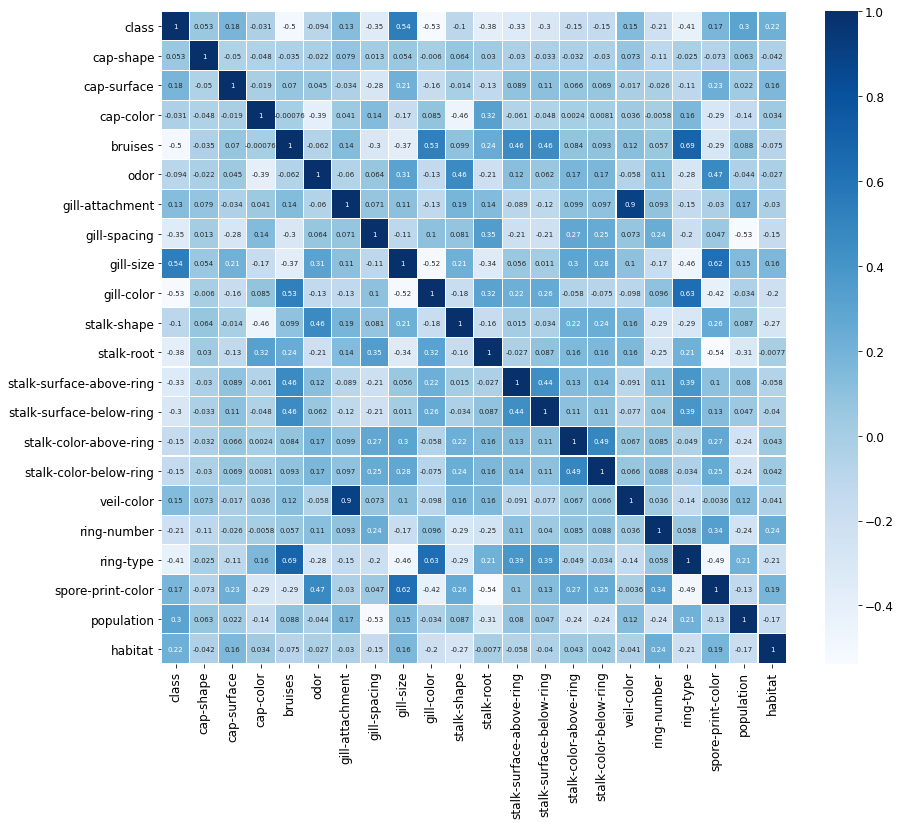

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(mushrooms.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

We are most interested with how these features correlate with class, in which 1=poisonous and 0=edible.
There is no perfect correlation, with the most correlated being gill-size at 0.54 and least correlated is gill colour at -0.53. 

This further points to gill-colour being an important feature. This category ranges from 1-12, and through deeper analysis of this feature we can see that the more colourful and "lighter" the gill is (moving towards #12), the more likely it is to be poisonous (see Appendix A). This does follow traditional "folk" knowledge that poisonous mushrooms are brightly colored. However, this correlation is not perfect and following this rule will provide misleading information (Lantz). The lack of high correlation for any variable proves that no simple rules for determining mushroom class, so more complex machine learning classification is justified.

## Preparing a test / training set:

It is important to set aside a test set, which will be used to test the models at a later stage. This will be done with the following code which will pick 20% of instances randomly and set it aside:

In [18]:
from sklearn.model_selection import train_test_split

y = mushrooms["class"].values # y is "class" column as numpy array. This represents the "ground truth"
x = mushrooms.drop(["class"], axis=1).values # x is all data except "class" column. Representing all of the features

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2) # Split data for train and test.

In [19]:
X = x_train #shortened variables which will be used for all training
y = y_train

In [20]:
assert len(x_train) == len(y_train) #training data with and without class are equal

In [21]:
len(y_train)

6499

In [22]:
assert len(x_test) == len(y_test)  #test data with and without class are equal

In [23]:
len(y_test)

1625

You can see there is a consistent split of 6499 for the training set and 1625 for the test set. This correctly adds up to 8124 (total number of instances).

Since no new data will be added to the mushrooms dataset, this random permutation of the test/training set with (np.random.seed(42)) will remain consistent throughout modelling. The dataset is also large enough to not require stratified sampling.

We can also check again for the correlation of variables with the class feature (poisonous = 1, edible = 0). This time using a correlation matrix as follows:

# <u>Model Exploration<u>

## Support Vector Machines (SVM) (Linear and SVC)

 SVMs are particularly well suited for classification of complex small- or medium-sized datasets, so its use here is justified.
 
 I will initially explore a Linear SVC for classification:

In [24]:
from sklearn import svm

In [25]:
lin_clf = svm.LinearSVC() #defining the parameters of linear svm classifier
lin_clf.fit(X, y) #fitting the training data to the model

C:\Users\marku\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [26]:
predicted = lin_clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, predicted)

0.9532307692307692

Linear classification SVC returns a score of 94% accuracy at classifying the mushrooms. This is much too low for this type of problem. At this rate more than 1 in 20 mushrooms would be wrongly classified, making it likely that a poisonous mushroom would be ingested.

Due to this inaccuracy, I will also explore a regular, non-linear Support Vector Classifier (SVC) model. LinearSVC is preferable for very large datasets, but because this data is only 8124 instances, a normal SVC will suffice:

In [29]:
clf = svm.SVC()
clf.fit(X, y) #fit to training data, you can see no convergence warning appears

SVC()

In [30]:
predicted_svc = clf.predict(x_test)
accuracy_score(y_test, predicted_svc)

0.9938461538461538

This is a significant improvement over the Linear model, as there is a 99.3% chance that this correctly predicts the mushroom class.

We can practice with one mushroom as an example, from the test set:

In [31]:
single_mushroom = x_test[5] # this will be a single test mushroom

In [32]:
single_mushroom # the characteristics of the mushroom

array([5, 3, 4, 0, 8, 1, 0, 1, 0, 1, 0, 1, 2, 7, 6, 2, 1, 0, 7, 4, 2],
      dtype=int64)

In [33]:
mushrooms.loc[(mushrooms['cap-shape'] == 5) & (mushrooms['cap-surface'] == 3) & (mushrooms['cap-color'] == 4)
             & (mushrooms['bruises'] == 0) & (mushrooms['odor'] == 8) & (mushrooms['gill-attachment'] == 1) 
             & (mushrooms['gill-spacing'] == 0) & (mushrooms['gill-size'] == 1) & (mushrooms['gill-color'] == 0) 
             & (mushrooms['stalk-shape'] == 1) & (mushrooms['stalk-root'] == 0) & (mushrooms['stalk-surface-above-ring'] == 1) 
             & (mushrooms['stalk-surface-below-ring'] == 2) & (mushrooms['stalk-color-above-ring'] == 7) 
             & (mushrooms['stalk-color-below-ring'] == 6) & (mushrooms['veil-color'] == 2) & (mushrooms['ring-number'] == 1) 
             & (mushrooms['ring-type'] == 0) & (mushrooms['spore-print-color'] == 7) & (mushrooms['population'] == 4) 
             & (mushrooms['habitat'] == 2)] #locating that single mushroom in the data to see its true class

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5761,1,5,3,4,0,8,1,0,1,0,...,1,2,7,6,2,1,0,7,4,2


There is a 99.3% chance that this mushroom is correctly predicted as class=1, or poisonous.

In [34]:
clf.predict(single_mushroom.reshape(1,-1)) #reshaping of array needed to fit into clf.predict() method

array([1], dtype=int64)

The prediction is correct! The user should not eat this mushroom.

We can further tests the accuracy of this model using a cross-validation score. Which splits the data in k (10) different folds and tests the predicton accuracy of the model on each.

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_10 = cross_val_score(clf, X, y, cv=10)
cross_val_10

array([0.99076923, 0.99076923, 0.99692308, 0.98307692, 0.98461538,
       0.98769231, 0.98769231, 0.98461538, 0.99076923, 0.98921418])

In [36]:
cross_val_10.mean() #calculate mean from 10 cross validation splits

0.988613725257793

Across 10 different splits, the accuracy score remains very high, over 98% in each case and a mean of 98.86%

To better understand these models, we can explore and visualize the predictive splitting. To do this we must do a quick arbitrary feature reduction.

Based on the histogram of each feature in the data exploration section, I have chosen two features with high diversity and good correlation to mushroom class; gill-colour and habitat

In [37]:
x_train_small = x_train[:, [8, -1]] # this is gill colour [8] and habitat [-1] split into useable arrays

First we will plot the decision boundary / prediction of LinearSVC model:

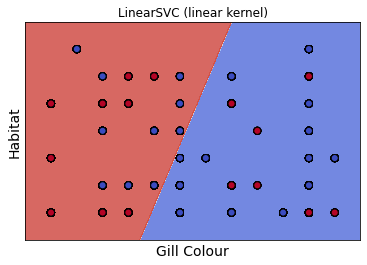

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf_small, xx, yy, **params):
    Z = clf_small.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


C = 1.0  # SVM regularization parameter
models = (
    svm.LinearSVC(C=C, max_iter=10000, random_state = 42),
)

models = (clf_small.fit(x_train_small, y) for clf_small in models)

# title for the plots
titles = (
    "LinearSVC (linear kernel)",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1, squeeze = False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_train_small[:,0], x_train_small[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf_small, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf_small, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Gill Colour")
    ax.set_ylabel("Habitat")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#work referenced (Scikit)

You can see it is a fairly basic decision boundary. Wrongly categorizing many poisonous mushrooms as edible and vice versa. We can check the accuracy:

In [39]:
x_test_small = x_test[:, [8, -1]] #splitting the test data in order to evaluate this reduced feature model

In [40]:
clf_small.score(x_test_small,y_test) #accuracy score for the reduced LinearSVC model

0.7433846153846154

74% is a much worse result, but not surprising given the lack of features and simple split.

Next we can evaluate the regular non linear SVC model, again using the gill-colour and habitat features:

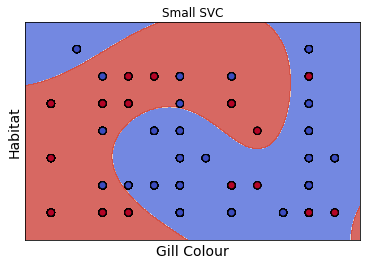

In [41]:
def plot_contours_2(ax, SVC_clf_small, xx, yy, **params):
    Z = SVC_clf_small.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0  # SVM regularization parameter
models = (
     svm.SVC(),
)

models = (SVC_clf_small.fit(x_train_small, y) for SVC_clf_small in models)

# title for the plots
titles = (
    "Small SVC",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1, squeeze = False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_train_small[:,0], x_train_small[:,1]
xx, yy = make_meshgrid(X0, X1)

for SVC_clf_small, title, ax in zip(models, titles, sub.flatten()):
    plot_contours_2(ax, SVC_clf_small, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Gill Colour")
    ax.set_ylabel("Habitat")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [42]:
SVC_clf_small.score(x_test_small,y_test) #this is a quicker way to get accuracy score

0.819076923076923

At 82%accuracy you can see SVC offers an improvement over the LinearSVC. The SVC enacts a much more complex method decision boundary (not simply a straight line), which further proves the reason for selecting SVC over a linear model. The accuracy is still fairly low at 85%, which confirms the need for more than these two features.

The nature of this dataset makes it very important to distinguish between the types of innacurate classifications. Despite a 99.4% accuracy rate in the original SVC even a few falsely classified edible mushrooms could be dangerous when put into practice. To explore the difference between false negatives and false positives we can analyze the SVC model using a confusion matrix:

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_svc) #using the y_test (true) data and the predicted y_values, after fitting the x_test data

array([[842,   1],
       [  9, 773]], dtype=int64)

This can be visualized as follows:

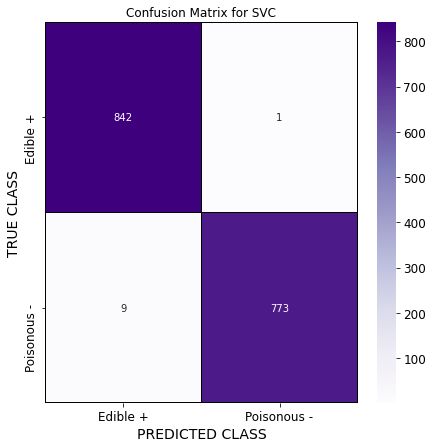

In [44]:
cm = confusion_matrix(y_test, predicted_svc)
x_axis_labels = ["Edible +", "Poisonous -"]
y_axis_labels = ["Edible +", "Poisonous -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for SVC')
#plt.savefig("svccm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()
#work referenced (Tank)

Each row in a confusion matrix represents an actual class (labeled TRUE CLASS), while each column represents a predicted class. 

This means in the predicted data, 9 poisonous mushrooms were falsely labelled as edible, and 1 edible mushroom was falsely labelled as poisonous. In other words; 9 False negatives and 1 false positive. False negatives in this case are much worse, as falsely beleiving a mushroom is edible can result in serious illness.

The confusion matrix and false negative rate is therefore very important to analyze for all future models, and must be assessed in addition to simply the accuracy score.

More classification models will be analyzed below:

## SGD Classifier

In [45]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd_clf.fit(X, y)

predicted_sgd = clf.predict(x_test) #evaluation

In [46]:
accuracy_score(y_test, predicted_sgd)

0.9938461538461538

In [47]:
confusion_matrix(y_test, predicted_sgd)

array([[842,   1],
       [  9, 773]], dtype=int64)

SGD shows a very high accuracy rate at 99.4% and a very few False negatives.

## Gaussian Process Classifiers (GPC)

In [48]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [49]:
clf_gpc = GaussianProcessClassifier()
clf_gpc.fit(X, y)

GaussianProcessClassifier()

In [50]:
predicted_gpc = clf_gpc.predict(x_test)
accuracy_score(y_test, predicted_gpc)

0.9993846153846154

In [51]:
clf_gpc.score(x_test, y_test) #quick way to get the score DELETE

0.9993846153846154

99.94% accuracy is a phenomenal score. We can test it in 5 different splits through cross validation:

In [52]:
cross_val_5_gpc = cross_val_score(clf_gpc, X, y, scoring='accuracy', cv=5)
cross_val_5_gpc

array([0.99923077, 0.99923077, 0.99923077, 1.        , 1.        ])

In [53]:
cross_val_5_gpc.mean()

0.9995384615384616

The mean after 5-fold cross validation is still very high at above 99.9%. The confusion matrix can be plotted as follows:

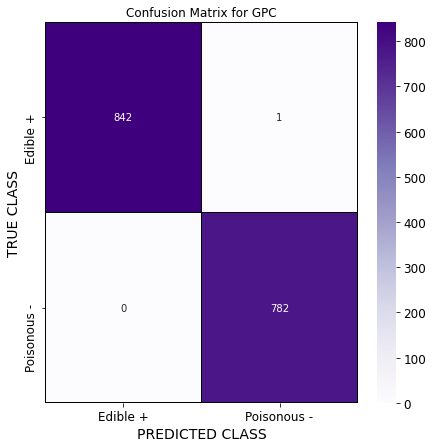

In [54]:
cm = confusion_matrix(y_test, predicted_gpc)
x_axis_labels = ["Edible +", "Poisonous -"]
y_axis_labels = ["Edible +", "Poisonous -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for GPC')
plt.show()


This is a very good result, with 1 false positive and 0 false negatives. As explained, false negatives are much worse, so this not happening once is an extremely good result.

## KNN Classification

In [55]:
from sklearn.neighbors import KNeighborsClassifier # import for classifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X,y)
predicted_knn = clf_knn.predict(x_test)
accuracy_score(y_test, predicted_knn)

0.9963076923076923

Another very good result with KNN classification. This can be checked in a confusion matrix:

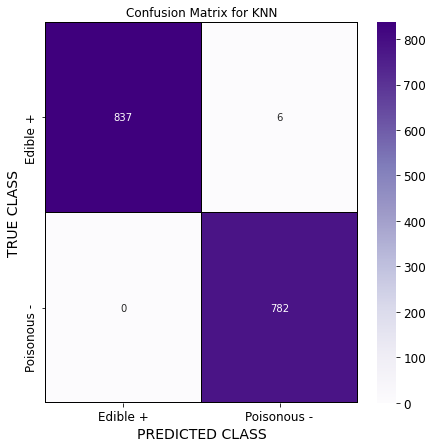

In [56]:
cm = confusion_matrix(y_test, predicted_knn)
x_axis_labels = ["Edible +", "Poisonous -"]
y_axis_labels = ["Edible +", "Poisonous -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for KNN')
plt.show()

0 false negatives and 6 false positives. This is a very good result, but not quite as good as the Gaussian Process Classifier, which had only one false positive.

## Naive Bayes Classification

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X,y)

nb.score(x_test,y_test)

0.9218461538461539

This is not a very good result for our data. Further exploration is not needed.

## Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X, y)
predicted_dt = clf_dt.predict(x_test)

In [59]:
accuracy_score(y_test, predicted_dt)

1.0

The Decision Tree classifier has achieved the best result yet, at a perfect 100%. This can be confirmed through cross validation and assessed with a confusion matrix:

In [60]:
cross_val_dt = cross_val_score(clf_dt, X, y, scoring='accuracy', cv=100)
cross_val_dt.mean()

1.0

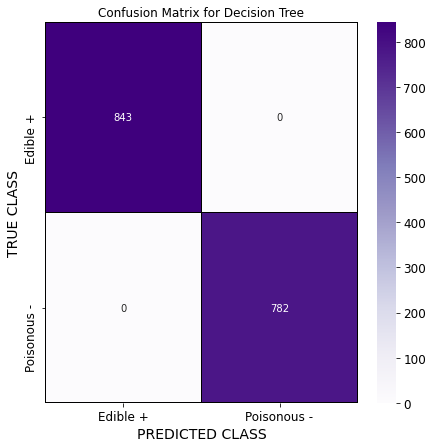

In [61]:
cm = confusion_matrix(y_test, predicted_dt)
x_axis_labels = ["Edible +", "Poisonous -"]
y_axis_labels = ["Edible +", "Poisonous -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for Decision Tree')
#plt.savefig("svccm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Even after 100 splits of the training data in cross-validation, the decision tree has achieved an accuracy score of 100% in every case. There are also 0 false negatives or positives as expected. 

We can visualize this decision tree below:

In [62]:
mushrooms_dt = mushrooms.drop(columns=['class']) # for visualization column names

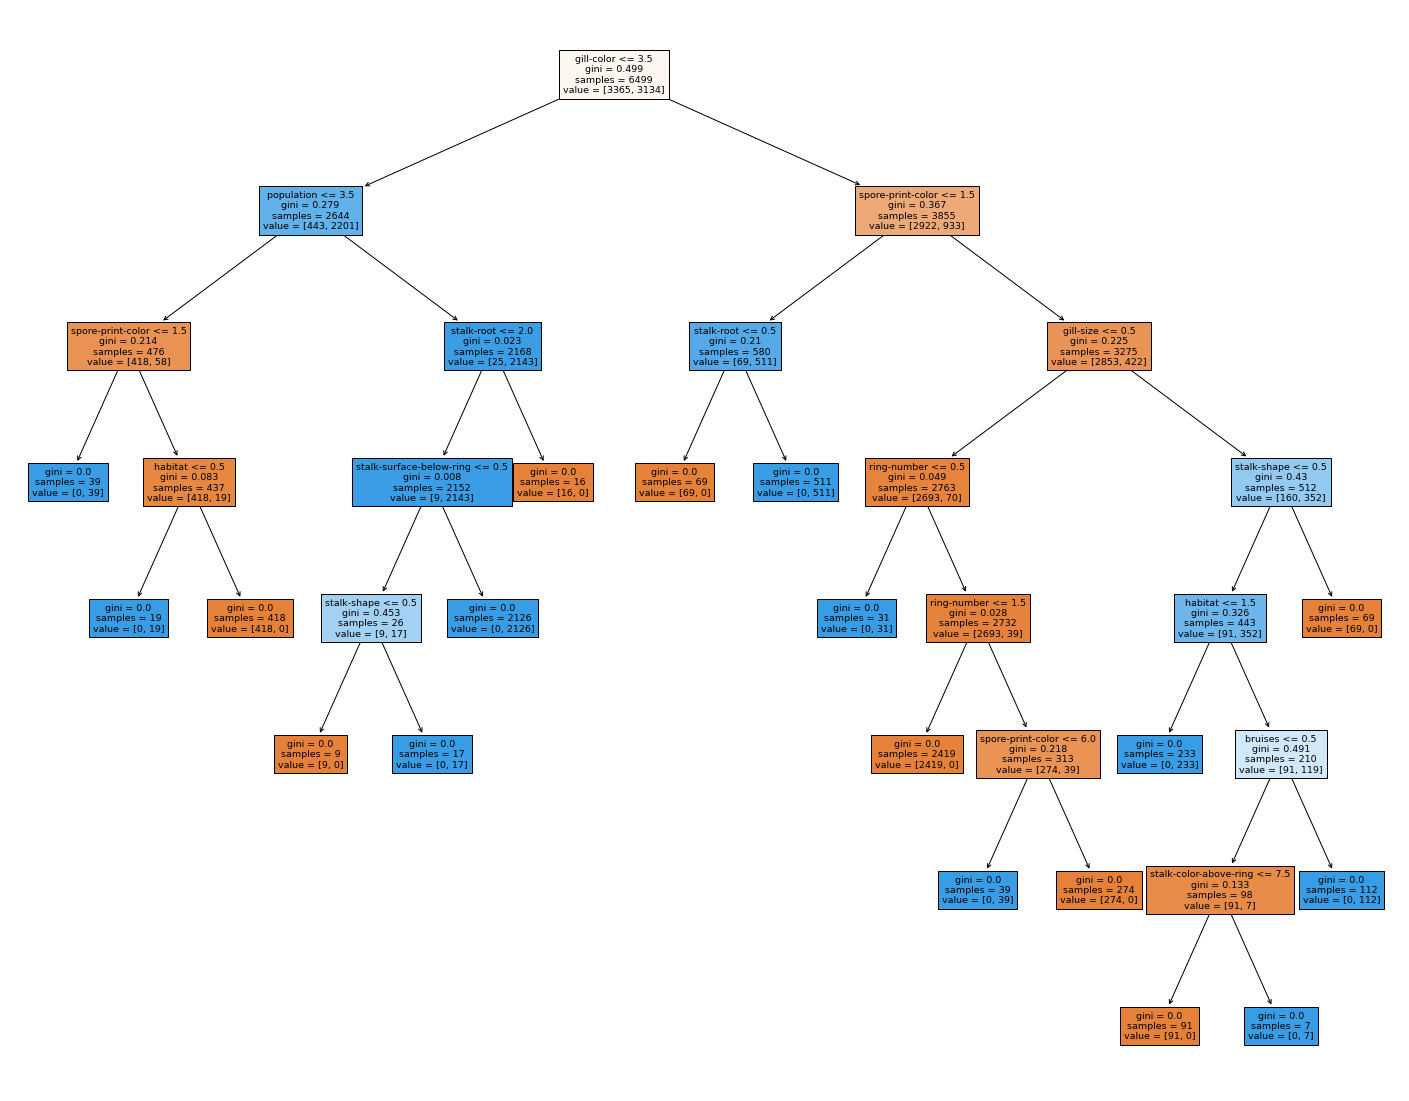

In [63]:
from matplotlib import pyplot as plt #imports for plotting the tree
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names = mushrooms_dt.columns,
                   filled=True,
                  fontsize = 9.5)

The visualized decision tree can provide a handy tool for any single mushroom classification.

## <u>Fine Tuning of Selected Models<u>

After training seven different models (LinearSVC, SVC, SDG, Gaussian Process, KNN, Naive Bayes, and Decision Tree), the two best models were clearly **Decision Tree** (which achieved 100% accuracy) and the **Gaussian Process Classifier** (near 100% with 1 false positive).

Because of their near perfect accuracy, fine tuning will not be needed on these models as-is. However, there is value in reducing the number of features needed for prediction. For example, if someone has collected wild mushrooms but does not have the tools to measure "gill-size", they may still want to classify the mushrooms for consumption. Feature reduction can also improve computational efficiency and provide cleaner visualizations.

This section will focus on dimensionality / feature reduction, and ensuing model performance, using only the **Decision Tree** and **Gaussian Process classifiers**.

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm (Géron). PCA won't help me find the actual names of the most important features, but it can help me in showing how many features my dataset can be reduced to while still being effective.

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 15) #specifying the number of features to analyze
pca.fit(X) #fit to training data
pca.explained_variance_ratio_

array([0.33946752, 0.16490117, 0.12242713, 0.06888479, 0.0585213 ,
       0.05083956, 0.04590545, 0.0389389 , 0.03566308, 0.02547994,
       0.02016967, 0.01012371, 0.00557913, 0.00414982, 0.00339577])

This explained variance ratio of the top 15 features can be plotted for better analysis:

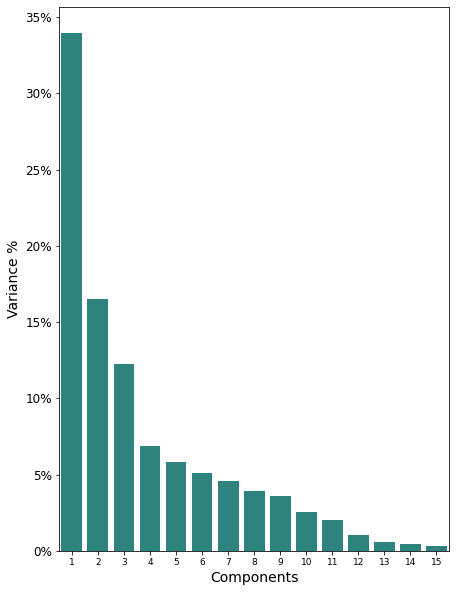

In [65]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from sklearn import decomposition

# setup figure
fig = plt.figure(figsize=(7,10));
ax = fig.add_subplot(111);

# plot bar chart
sns.barplot(x=np.arange(1,16), y=pca.explained_variance_ratio_, color='#21918c');

# change label properties
plt.ylabel('Variance %');
plt.xlabel('Components')
plt.xticks(size=9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0)) # change y label to display as percentage

plt.show();

Based on the dataset and PCA, we can see that after the third component there is a steep "elbow" or drop off in the explained varaince percentage. This means that a model with only 3 components will likely still provide a fairly accurate model. If we look more closely, we can see another drop off after the 11th component. This might prove useful in later feature reduction.

## Decision Tree Feature Importance

PCA may provide insight into the number of components needed, but measuring feature importance using the decision tree can provide insight into which actual variables have the strongest predictive power. This can be calculated and visualized as follows:

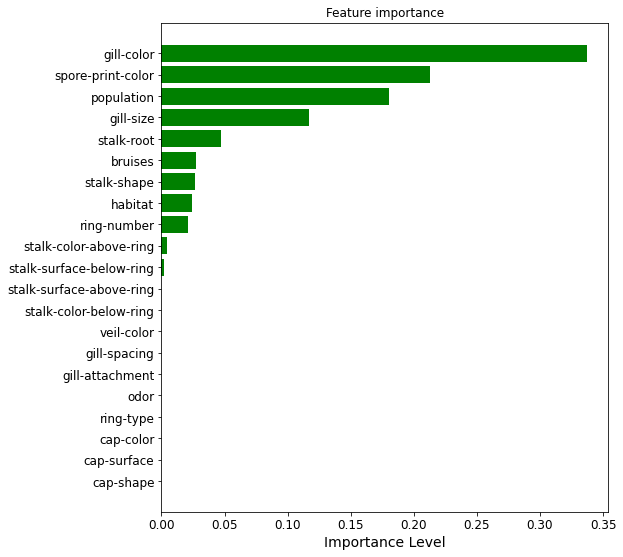

In [66]:
features_list = mushrooms_dt.columns.values
feature_importance = clf_dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,9))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance Level')
plt.title('Feature importance')
plt.draw()
plt.show()
#work referenced (Tank)

This follows a fairly similar pattern to the PCA above. We can see four very important features, with gill-colour being significantly ahead of the others.

## Grid search, Ensemble and Feature reduction

In order to enact the feature reduction for a more efficient model, we can train the train / test set to take only the top three features from above. These are; gill-color, spore-print-color, and population.

In [67]:
x_train_3_features = x_train[:, [7, -4, -2]] #selecting top three features
x_test_3_features = x_test[:, [7, -4, -2]] 

We can then run a decision tree classifier using only these three features.

In [68]:
clf_dt_3f = DecisionTreeClassifier()
clf_dt_3f.fit(x_train_3_features, y)
predicted_dt_3f = clf_dt_3f.predict(x_test_3_features)
accuracy_score(y_test, predicted_dt_3f)

0.9224615384615384

With an accuracy score of 92% this is a much worse model than the original decision tree using 21 features.

In order to try and improve this result, we can use the RandomForestClassifier ensemble method:

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_3 = RandomForestClassifier()

rf_3.fit(x_train_3_features, y)
predicted_rf_3f = rf_3.predict(x_test_3_features)

accuracy_score(y_test, predicted_rf_3f)

0.9224615384615384

At 92% this shows no improvement over the regular decision tree.

We can try and fine-tune the hyperparameters of this 3-feature random forest by using a Grid Search as follows:

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc_3 = GridSearchCV(estimator=rf_3, param_grid=param_grid, cv= 5)


CV_rfc_3.fit(x_train_3_features, y)

CV_rfc_3.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

The Grid Search has identified the best parameters as; criterion= 'gini',max_depth= 4,max_features= 'auto', and n_estimators= 200. We can input these again into an optimized RandomForestClassifier using the top three features:

In [71]:
rf_3_opt = RandomForestClassifier(criterion= 'gini',max_depth= 4,max_features= 'auto',n_estimators= 200)

rf_3_opt.fit(x_train_3_features, y)
predicted_rf_3f_opt = rf_3_opt.predict(x_test_3_features)

accuracy_score(y_test, predicted_rf_3f_opt)

0.9193846153846154

Even with the absolute best parameters, the Random Forest Classifier still achieves 92% accuracy. This shows the limits of including only three features, even if they are the most important.

By analyzing both the feature importance diagram and the PCA importance bar graph again, we can see that there is also a noticeable drop-off after 11 features. This may be the magic number of features to reduce to in order to classify efficiently with a high degree of accuracy.

The list of the 11 most important features in order are:'gill-color','spore-print-color','population','gill-size','stalk-root','bruises','habitat','stalk-shape','stalk-color-below-ring','veil-color','ring-number'.

We can reduce the number of features in a train / test to these top 11 as follows:

In [72]:
x_train_11_features = x_train[:, [8,-3,-2,7,10,3,-1,9,-7,-6,-5]] #selecting top eleven features
x_test_11_features = x_test[:, [8,-3,-2,7,10,3,-1,9,-7,-6,-5]] 

We can now fit a RandomForestClassifier to these 11 features:

In [73]:
clf_rf_11f = RandomForestClassifier()
clf_rf_11f.fit(x_train_11_features, y)
predicted_rf_11f = clf_rf_11f.predict(x_test_11_features)

In [74]:
accuracy_score(y_test, predicted_rf_11f)

1.0

Incredibly, with just the 11 best features we were able to achieve an accuracy score of 100% with random forest method.

## Summary and Conclusion

After testing seven different models, and fine-tuning two of them through feature reduction, grid-search, PCA, and a random forest ensemble method, the final solution will be the RandomForestClassifier using the top 11 features.

One final presentation of this model is as follows:

In [98]:
clf_rf_11f = RandomForestClassifier() #the model
clf_rf_11f.fit(x_train_11_features, y)
predicted_rf_11f = clf_rf_11f.predict(x_test_11_features)
accuracy_score(y_test, predicted_rf_11f) #accuracy score

1.0

In [99]:
cross_val_rf_11 = cross_val_score(clf_rf_11f, X, y, scoring='accuracy', cv=100)
cross_val_rf_11.mean() #mean accuracy score after k=100 cross-validation

1.0

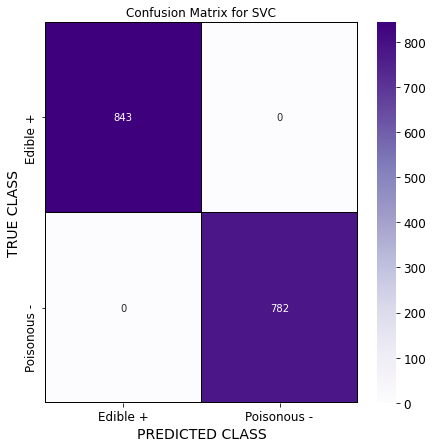

In [77]:
cm = confusion_matrix(y_test, predicted_dt)
x_axis_labels = ["Edible +", "Poisonous -"]
y_axis_labels = ["Edible +", "Poisonous -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for SVC')
#plt.savefig("svccm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

You can see the model still retains 100% accuracy after 100 splits of cross-validation. It contains 0 false negatives or false positives on the confusion matrix. The lower feature count also makes the model computationally easier to run if the data were scaled upwards. And it will also be easier to add future data, as not all 22 feature categories will be needed, and can provide cleaner visualizations if needed.

For all of these reasons, the 11-feature RandomForestClassifier is the ideal model solution for this classification problem.

# Appendix

The following is a description of the dataset Attribute Information, sourced from The UCI Machine Learning Repository (UCI).
You can see the letter's for each category corresponds to a specific feature of each mushroom.

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Bibliography

Géron, Aurélien. Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly, 2020. 

Lantz, Brett. Machine Learning with R: Discover How to Build Machine Learning Algorithms, Prepare Data, and Dig Deep into Data Prediction Techniques with R. Packt Publishing, 2015. 

“Plot Different SVM Classifiers in the Iris Dataset.” Scikit, https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py. 

Tank, Kanchi. “Mushroom Classification Using Different Classifiers.” Medium, Analytics Vidhya, 30 Sept. 2020, https://medium.com/analytics-vidhya/mushroom-classification-using-different-classifiers-aa338c1cd0ff. 

UCI Machine Learning Repository: Mushroom Data Set, https://archive.ics.uci.edu/ml/datasets/mushroom. 